In [1]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot

import swasputils

In [2]:
classifications = swasputils.AggregatedClassifications()

In [3]:
classifications.add_classification_labels()

In [4]:
classifications.df.head()

,SWASP ID,Period Number,Period,Classification,Period Uncertainty,Classification Count,Classification Label
subject_id,,,,,,,
21813536,1SWASPJ000000.15+320847.6,1,24802.357,3,0,4,EW
21813537,1SWASPJ000000.74+561358.9,1,1884039.250,6,1,3,Junk
21813538,1SWASPJ000000.74+561358.9,3,428081.250,6,1,6,Junk
21813539,1SWASPJ000000.74+561358.9,5,275859.969,6,1,3,Junk
21813540,1SWASPJ000001.10+562043.7,2,323290.344,6,1,3,Junk


In [5]:
period_counts = classifications.df.pivot_table(
    index='SWASP ID',
    values=['Period Number', 'Period'],
    aggfunc={
        'Period Number': lambda x: len(x.unique()),
        'Period': [numpy.mean, numpy.std],
    },
)
period_counts.head()

Period                Period Number
                                   mean            std      <lambda>
SWASP ID                                                            
1SWASPJ000000.15+320847.6  2.480236e+04            NaN             1
1SWASPJ000000.74+561358.9  8.626602e+05  887808.689601             3
1SWASPJ000001.10+562043.7  2.216910e+05   57779.079031             5
1SWASPJ000001.37+455849.8  3.006162e+06            NaN             1
1SWASPJ000001.54+551206.8  3.505436e+05   76109.963778             3

<AxesSubplot:title={'center':'Number of Detected Periods Per SWASP Source'}, ylabel='Frequency'>

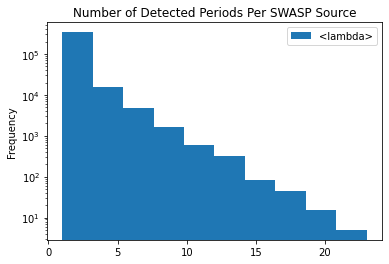

In [6]:
period_counts['Period Number'].plot.hist(
    title='Number of Detected Periods Per SWASP Source',
    log=True,
    xlabel='Number of Periods',
)

<AxesSubplot:xlabel='<lambda>', ylabel='mean'>

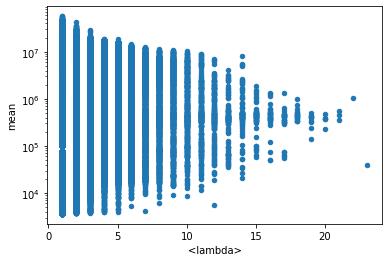

In [7]:
means = period_counts['Period Number'].copy().merge(period_counts['Period']['mean'], left_index=True, right_index=True)
means.plot.scatter(x='<lambda>', y='mean', logy=True)

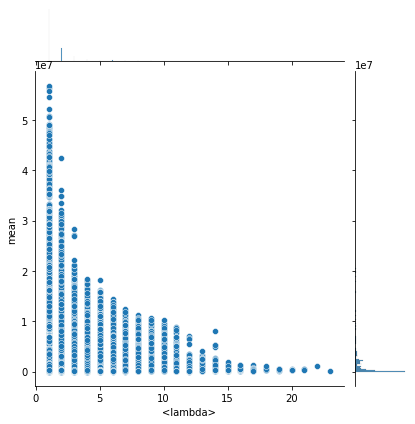

In [11]:
seaborn.jointplot(
    data=means,
    x='<lambda>',
    y='mean',
   # kind='hex'
)